In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import kstest

In [3]:
df = pd.read_csv('cookie_cats.csv')
df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [5]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [6]:
df.version.unique()

array(['gate_30', 'gate_40'], dtype=object)

In [10]:
df = df[df.sum_gamerounds < 3000]

In [11]:
df.nlargest(10, ['sum_gamerounds'])

,userid,version,sum_gamerounds,retention_1,retention_7
7912,871500,gate_30,2961,True,True
29417,3271615,gate_40,2640,True,False
43671,4832608,gate_30,2438,True,True
48188,5346171,gate_40,2294,True,True
46344,5133952,gate_30,2251,True,True
87007,9640085,gate_30,2156,True,True
36933,4090246,gate_40,2124,True,True
88328,9791599,gate_40,2063,True,True
6536,725080,gate_40,2015,True,True
655,69927,gate_30,1906,True,True


In [12]:
df.describe()

,userid,sum_gamerounds
count,9.018800e+04,90188.000000
mean,4.998397e+06,51.320253
std,2.883298e+06,102.682719
min,1.160000e+02,0.000000
25%,2.512211e+06,5.000000
50%,4.995804e+06,16.000000
75%,7.496461e+06,51.000000
max,9.999861e+06,2961.000000


In [15]:
print(df.version.groupby(df.version == 'gate_30').count())
print ('------------------')
print(df.version.groupby(df.version == 'gate_40').count())

version
False    45489
True     44699
Name: version, dtype: int64
------------------
version
False    44699
True     45489
Name: version, dtype: int64


Данные распределены примерно одинаково

In [16]:
mannwhitneyu(df[df.version == 'gate_30'].sum_gamerounds,
             df[df.version == 'gate_40'].sum_gamerounds)

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.05089155279145376)

In [20]:
print(kstest(df['sum_gamerounds'][df.version == 'gate_30'], 'norm'))
print ('------------------')
print(kstest(df['sum_gamerounds'][df.version == 'gate_40'], 'norm'))

KstestResult(statistic=0.8724153079945488, pvalue=0.0, statistic_location=2, statistic_sign=-1)
------------------
KstestResult(statistic=0.8707186187388001, pvalue=0.0, statistic_location=2, statistic_sign=-1)


In [21]:
ttest_ind(df[df.version == 'gate_30'].sum_gamerounds,
          df[df.version == 'gate_40'].sum_gamerounds)

Ttest_indResult(statistic=0.0633675766982082, pvalue=0.9494739458256001)

In [ ]:
р-value ниже

In [40]:
plt.style.use('ggplot')

control = df[df.version == 'gate_30']
print(control.head(10))

print ('-------------------------')

test = df[df.version == 'gate_40']
print(test.head(10))

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500]
plot_control = pd.DataFrame(Group_A.groupby(pd.cut(control['sum_gamerounds'],bins=bins)).count())
plot_test = pd.DataFrame(Group_B.groupby(pd.cut(test['sum_gamerounds'], bins=bins)).count())

    userid  version  sum_gamerounds  retention_1  retention_7
0      116  gate_30               3        False        False
1      337  gate_30              38         True        False
6     1066  gate_30               0        False        False
11    2101  gate_30               0        False        False
13    2179  gate_30              39         True        False
14    2218  gate_30             305         True         True
15    2382  gate_30              73         True        False
16    2392  gate_30              14         True        False
17    2451  gate_30             204         True         True
18    2482  gate_30             108         True         True
-------------------------
    userid  version  sum_gamerounds  retention_1  retention_7
2      377  gate_40             165         True        False
3      483  gate_40               1        False        False
4      488  gate_40             179         True         True
5      540  gate_40             187         

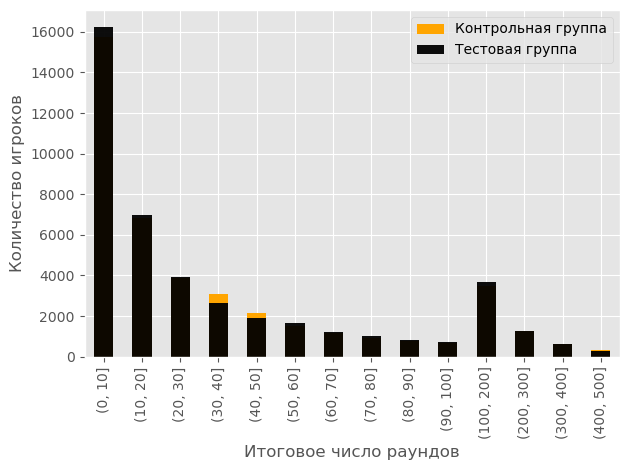

In [41]:
ax = plot_control.plot(kind = 'bar', y='userid', color = 'orange', alpha = 1)
plot_test.plot(kind = 'bar', y = 'userid', ax = ax, color = 'black', alpha = 0.95)
ax.set_xlabel('Итоговое число раундов')
ax.set_ylabel('Количество игроков')
plt.legend(['Контрольная группа', 'Тестовая группа'])
plt.tight_layout()
plt.grid(True)

In [42]:
day = df.retention_1.groupby(df.version).sum()/df.retention_1.groupby(df.version).count()
print(day*100)

version
gate_30    44.819795
gate_40    44.228275
Name: retention_1, dtype: float64


Данные по удержанию пользователя в течении одного дня примерно одинаковы

In [52]:
boot_day = []
for i in range(500):
  boot_mean = df.retention_1.sample(frac=1, replace=True).groupby(df.version).mean()
  boot_day.append(boot_mean)

boot_day = pd.DataFrame(boot_day)
print(boot_day)

version       gate_30   gate_40
retention_1  0.446472  0.441266
retention_1  0.445483  0.443197
retention_1  0.448897  0.444836
retention_1  0.454121  0.441911
retention_1  0.446867  0.445388
...               ...       ...
retention_1  0.444509  0.437966
retention_1  0.449316  0.442221
retention_1  0.448815  0.442778
retention_1  0.445916  0.444622
retention_1  0.448938  0.441763

[500 rows x 2 columns]


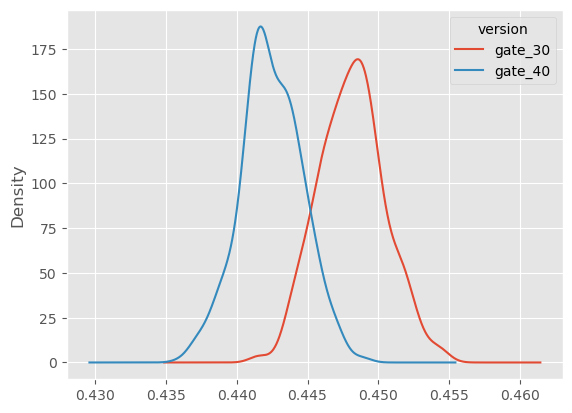

In [54]:
ax = boot_day.plot.kde()

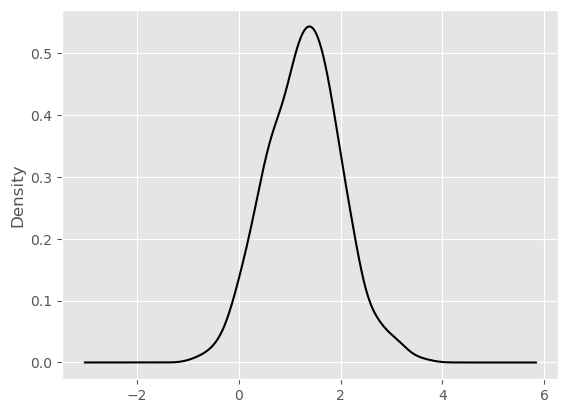

In [55]:
boot_day['difference'] = (boot_day['gate_30'] - boot_day['gate_40']) / boot_day['gate_40']*100
ax = boot_day['difference'].plot.kde(color = 'black')

In [58]:
prob = (boot_day['difference'] > 0).sum() / len(boot_day['difference'])
print(str(prob*100)+' %')

96.8 %


1-2 % в пользу контрольной группы (30) при однодневном удержании

In [59]:
df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count()

version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64

При 7-дневном удержании также разница в группах

In [62]:
boot_week = []
for i in range(500):
  boot_mean = df.retention_7.sample(frac=1, replace=True).groupby(df.version).mean()
  boot_week.append(boot_mean)

boot_week = pd.DataFrame(boot_week)
print(boot_week.head(10))

boot_week['diff'] = (boot_week['gate_30'] - boot_week['gate_40']) / boot_week['gate_40'] * 100

version       gate_30   gate_40
retention_7  0.187963  0.184931
retention_7  0.190550  0.183354
retention_7  0.189084  0.178839
retention_7  0.191028  0.183575
retention_7  0.191515  0.181413
retention_7  0.191171  0.184869
retention_7  0.189174  0.181030
retention_7  0.190829  0.181416
retention_7  0.188884  0.183457
retention_7  0.189911  0.180901


1.0


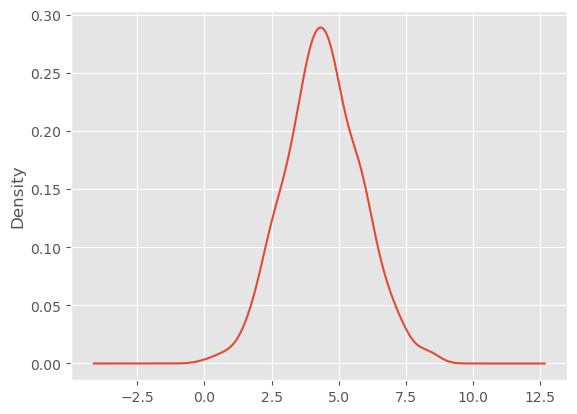

In [63]:
ax = boot_week['diff'].plot.kde()
prob = (boot_week['diff'] > 0).sum() / len(boot_week['diff'])
print(prob)

In [66]:
prob = (boot_week['diff'] > 0).sum() / len(boot_week['diff'])
print(str(prob*100)+' %')

100.0 %


Таким образом, при удержание 7 дней выше при условии, что ворота на 30 уровне. То есть, смещение врат на 40 уровень не рекомендуется. Контрольная группа win
